In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:36<00:00, 32.9MB/s]
100% 1.06G/1.06G [00:36<00:00, 31.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [28]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Flatten,Dropout
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img
import cv2

In [5]:
#Augmentation

BATCH_SIZE=32
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    '/content/train',
    target_size=(150,150),
    batch_size=BATCH_SIZE,
    class_mode='binary')

val_generator=train_datagen.flow_from_directory(
    '/content/test',
    target_size=(150,150),
    batch_size=BATCH_SIZE,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [20]:
conv_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

In [21]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [29]:
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
conv_base.trainable=False

In [25]:
# #normalize

# def process(image,label):
#   image=tf.cast(image/255,tf.float32)
#   return image,label

# train_ds =  train_ds.map(process)
# validation_ds = validation_ds.map(process)

In [30]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [31]:
history = model.fit_generator(train_generator,epochs=15,validation_data=val_generator)

<ipython-input-31-fe3df37ed934>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,epochs=15,validation_data=val_generator)


Epoch 1/15
625/625 [==============================] - 179s 283ms/step - loss: 0.3210 - accuracy: 0.8584 - val_loss: 0.2393 - val_accuracy: 0.8938
Epoch 2/15
625/625 [==============================] - 174s 278ms/step - loss: 0.2616 - accuracy: 0.8857 - val_loss: 0.2412 - val_accuracy: 0.8972
Epoch 3/15
625/625 [==============================] - 174s 279ms/step - loss: 0.2428 - accuracy: 0.8971 - val_loss: 0.2340 - val_accuracy: 0.8998
Epoch 4/15
625/625 [==============================] - 173s 277ms/step - loss: 0.2286 - accuracy: 0.9003 - val_loss: 0.2241 - val_accuracy: 0.9030
Epoch 5/15
625/625 [==============================] - 174s 278ms/step - loss: 0.2300 - accuracy: 0.9033 - val_loss: 0.2133 - val_accuracy: 0.9106
Epoch 6/15
625/625 [==============================] - 175s 279ms/step - loss: 0.2181 - accuracy: 0.9056 - val_loss: 0.2580 - val_accuracy: 0.8884
Epoch 7/15
625/625 [==============================] - 173s 277ms/step - loss: 0.2118 - accuracy: 0.9108 - val_loss: 0.2141 -

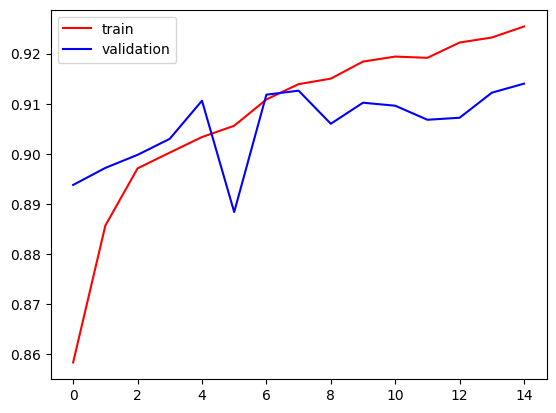

In [32]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

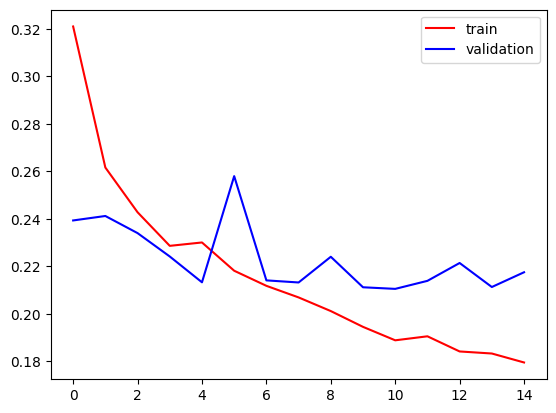

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

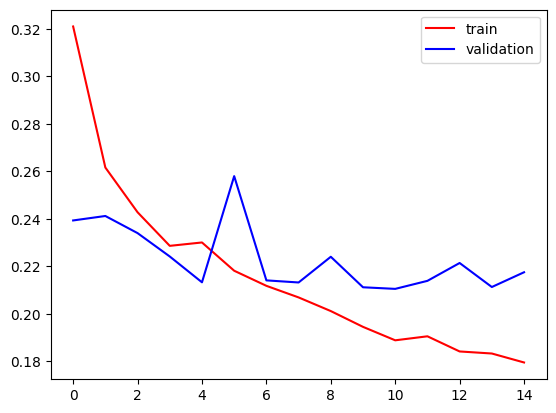

In [34]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [35]:
test_img=cv2.imread('cat.webp')

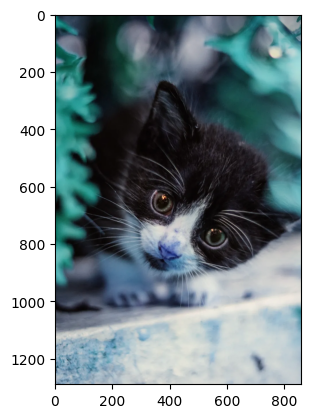

In [36]:
plt.imshow(test_img)

In [40]:
test_img=cv2.resize(test_img,(150,150))

In [41]:
test_input = test_img.reshape((1,150,150,3))

In [42]:
ans=model.predict(test_input)

1/1 [==============================] - 1s 1s/step


In [43]:
ans[0][0]

0.0

In [44]:
def predict_animal(ans):
  if(ans[0][0])==1:
    print('it is a dog')
  else:
    print('it is a cat')

In [45]:
predict_animal(ans)

it is a cat
